# Исследование объявлений о продаже квартир

Наша задача — научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроим файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из данных видно что столбец под названием cityCenters_nearest имеет не очень правильное название, лучше его исправить

In [3]:
data = data.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'}) 
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Из описания видно что в данных имеются аномальные значения, здесь надо поработать

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_сenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

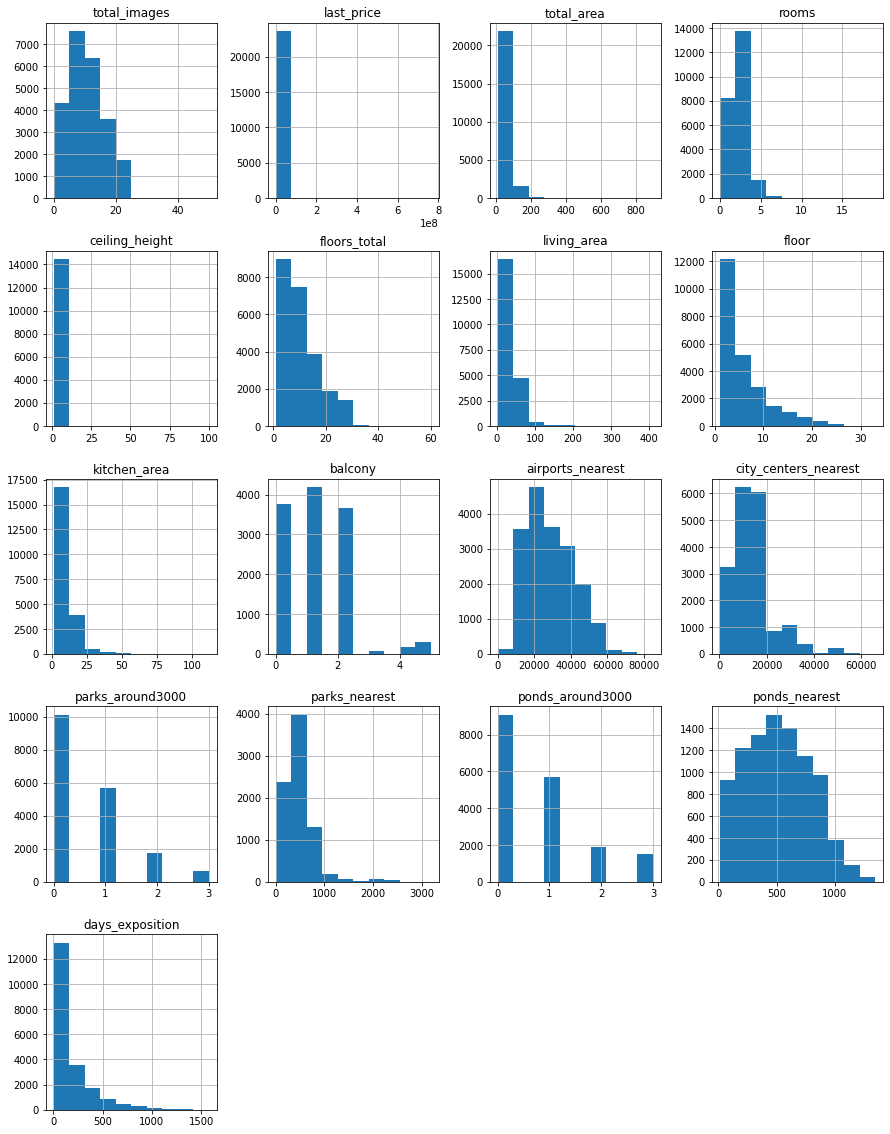

In [5]:
data.hist(figsize=(15, 20))

In [6]:
len(data)

23699

На всякий случай запросил размерность датафрейма чтобы потом проанализировать какой процент занимают пропуски

### Предобработка данных

In [7]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Есть столбцы с большим количеством пропусков.Изучим их поподробнее

In [8]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Скорее всего пропуски в 'is_apartment' это False. заполним пропуски False

In [9]:
data['is_apartment']=data['is_apartment'].fillna(False)

In [10]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Изменим тип данных в first_day_exposition

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') # преобразование даты
print(data['first_day_exposition']) 

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


In [12]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

проверим 'ceiling_height' на аномалии, посмотрим уникальные значения

In [13]:
data['ceiling_height'].value_counts()

2.65     9871
2.50     3515
2.60     1646
2.70     1574
3.00     1112
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Видим что есть аномально высокие потолки, скорее всего точка не втом месте, разделим такие значения на 10

In [14]:
for i in data['ceiling_height']:
     if i >= 9:
         data['ceiling_height'] = data['ceiling_height'].replace({i: i/10})

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в floors_total и locality_name  дропнем так как их количество не существенное

In [16]:
data= data.dropna(subset=['floors_total','locality_name']) #избавимся от этих данных колиство пропусков в них мало по сравнению
# с общим объемом

In [17]:
data['balcony']=data['balcony'].fillna(0) #скорее всего если есть пропуск значит количество балконов 0

In [18]:
data['balcony'] = pd.to_numeric(data['balcony'])
data['balcony'] = data['balcony'].astype('int')
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Найдём коэффициент соотношения средней общей площади (там где она есть .isnull() == False) к среднему жилой площади и заполняем пропуски отношением общей площади на коэффициент

In [19]:
area_kof = data[data['living_area'].isnull() == False]['total_area'].mean() / data[data['living_area']\
                                                                                   .isnull()== False]['living_area'].mean()
data['living_area'] = data['living_area'].fillna(data['total_area']/area_kof)

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_сenters_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Посчитаем пропущенные значения площади кухни также как и живой площади

In [21]:
area_kof = data[data['kitchen_area'].isnull() == False]['total_area'].mean() / data[data['kitchen_area'].isnull()== False]['kitchen_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']/area_kof)

In [22]:
data['kitchen_area'].isna().sum()

0

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_сenters_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Изменим тип данныхна числовой в last_price

In [24]:
data['last_price'] = data['last_price'].astype('int')

In [25]:
data.query('days_exposition == 0').count() 

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_сenters_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [26]:
data['days_exposition']=data['days_exposition'].fillna(1) # Заменю пропуски на 1 и заменю тип данных. 
data['days_exposition'] = data['days_exposition'].astype('int') 

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_сenters_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64

Остальные пропуски мы ничем не можем заменить так как у нас нет данных, либо они не будут использоваться для анализа
Удалить строки с пропусками тоже не вариант так как они занимают существенный объем.

### Посчитаем и добавим в таблицу новые столбцы

In [28]:
data['price_per_area'] = data['last_price'] / data['total_area']
data['price_per_area'] = data['price_per_area'].astype('int') #цена квадратного метра

In [29]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Создадим функцию чтобы поделить на категории

In [30]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [31]:
data['floor_category'] = data.apply(floor_category, axis = 1)


Столбец с расстоянием до центра в км.

In [32]:
data['city_сenters_nearest_km']=data['city_сenters_nearest']/1000
data['city_сenters_nearest_km']=data['city_сenters_nearest_km'].round()

### Проведем исследовательский анализ данных

Общая площадь

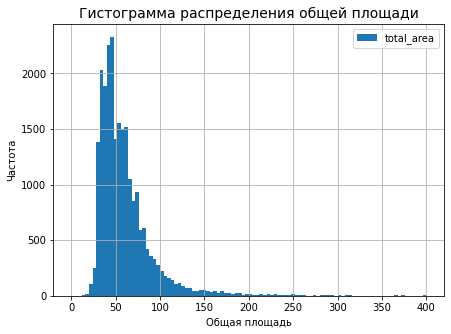

In [33]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (0,400))
data['total_area'].describe()
plt.title('Гистограмма распределения общей площади', fontweight='normal', color='k', fontsize=14)
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.show()

Есть небольшие выбросы но не критично

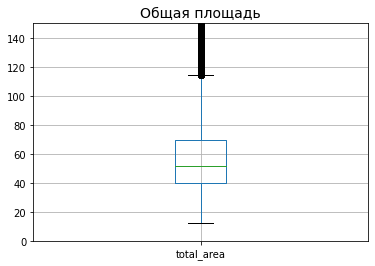

In [34]:
data.boxplot(column='total_area')
plt.ylim(0, 150)
plt.title('Общая площадь', fontweight='normal', color='k', fontsize=14)
plt.show()

Исходя из графика нормальными площадями считатся значения от 14 до 114 примерно

Жилая площадь

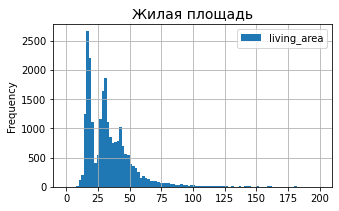

In [35]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,200))
data['living_area'].describe()
plt.title('Жилая площадь', fontweight='normal', color='k', fontsize=14)
plt.show()

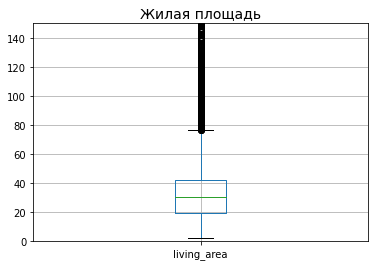

In [36]:
data.boxplot(column='living_area')
plt.ylim(0, 150)
plt.title('Жилая площадь', fontweight='normal', color='k', fontsize=14)
plt.show()

Площадь кухни

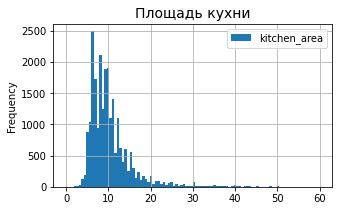

In [37]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,60))
data['kitchen_area'].describe()
plt.title('Площадь кухни', fontweight='normal', color='k', fontsize=14)
plt.show()

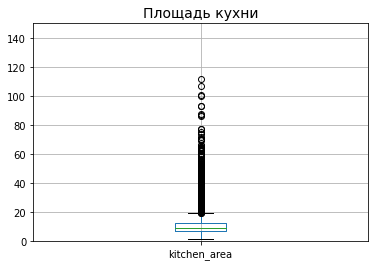

In [38]:
data.boxplot(column='kitchen_area')
plt.ylim(0, 150)
plt.title('Площадь кухни', fontweight='normal', color='k', fontsize=14)
plt.show()

Нормальные значения площади кухни лежат в диапозоне от 2 до 20 м2

ЦЕНА ОБЪЕКТА

In [39]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday_exposition,month_exposition,year_exposition,floor_category,city_сenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,1,120370,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785,3,8,2015,другой,14.00
3,0,64900000,159.00,2015-07-24,3,2.65,14.00,91.21,9,False,False,False,27.66,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424,408176,4,7,2015,другой,7.00
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000,1,6,2018,другой,8.00
5,10,2890000,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.00,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155,99195,3,11,2017,другой,19.00
7,5,7915000,71.60,2019-04-18,2,2.65,24.00,41.07,22,False,False,False,18.90,2,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,1,110544,3,4,2019,другой,12.00
8,20,2900000,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87454,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289,88524,6,2,2017,другой,15.00


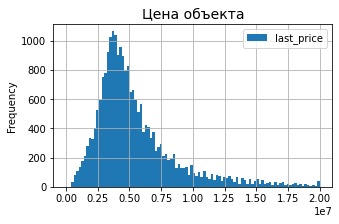

In [40]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,20000000))
data['last_price'].describe()
plt.title('Цена объекта', fontweight='normal', color='k', fontsize=14)
plt.show()

(-2.0, 20000000.0)

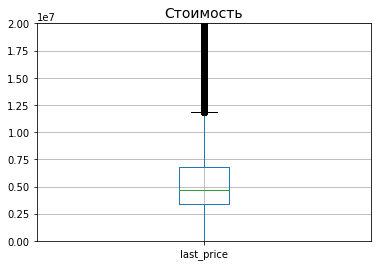

In [41]:
data.boxplot(column='last_price')
plt.title('Стоимость', fontweight='normal', color='k', fontsize=14)
plt.ylim(-2, 20000000)

Нормальные цены укладываются примерно до 12 млн.

Количество комнат

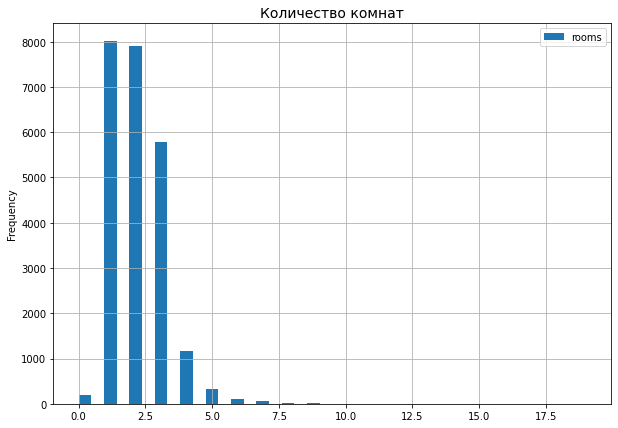

In [42]:
data.plot(y = 'rooms', kind = 'hist', bins = 40, grid=True, figsize = (10,7))
data['rooms'].describe()
plt.title('Количество комнат', fontweight='normal', color='k', fontsize=14)
plt.show()

(-5.0, 25.0)

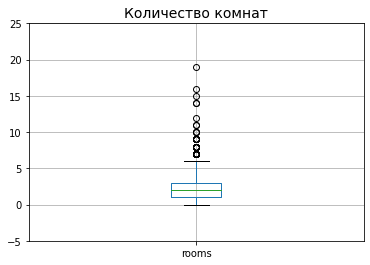

In [43]:
data.boxplot(column='rooms')
plt.title('Количество комнат', fontweight='normal', color='k', fontsize=14)
plt.ylim(-5, 25)

Диапозон нормального количества комнат это от 0 до 6

Высота потолков

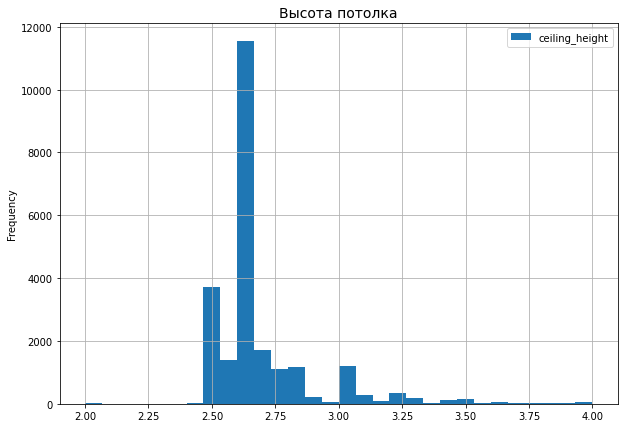

In [44]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,4), grid=True, figsize = (10,7))
data['ceiling_height'].describe()
plt.title('Высота потолка', fontweight='normal', color='k', fontsize=14)
plt.show()

(1.0, 5.0)

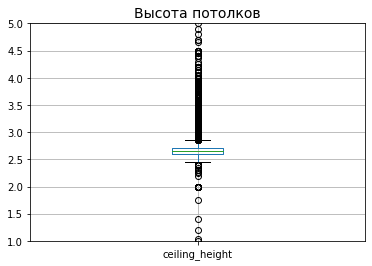

In [45]:
data.boxplot(column='ceiling_height')
plt.title('Высота потолков', fontweight='normal', color='k', fontsize=14)
plt.ylim(1, 5)

Стандартные потолки у нас от 2,5 м до 2,85

Этаж квартиры

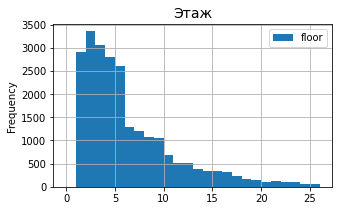

In [46]:
data.plot(y = 'floor', kind = 'hist', bins = 26, grid=True, figsize = (5,3), range = (0,26))
data['floor'].describe()
plt.title('Этаж', fontweight='normal', color='k', fontsize=14)
plt.show()

(1.0, 25.0)

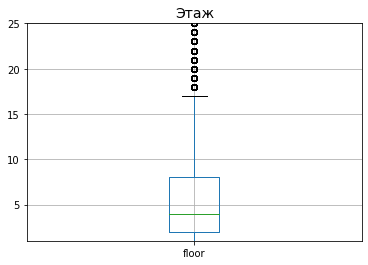

In [47]:
data.boxplot(column='floor')
plt.title('Этаж', fontweight='normal', color='k', fontsize=14)
plt.ylim(1, 25)

До 17 этажа это норма,то что выше это уже высотки. Самые распространенные значения от 0 до 6

общее количество этажей в доме

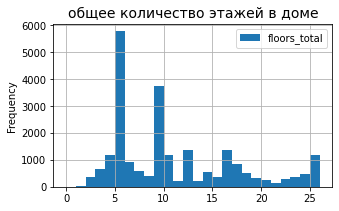

In [48]:
data.plot(y = 'floors_total', kind = 'hist', bins = 26, grid=True, figsize = (5,3), range = (0,26))
data['floors_total'].describe()
plt.title('общее количество этажей в доме', fontweight='normal', color='k', fontsize=14)
plt.show()

(-2.0, 40.0)

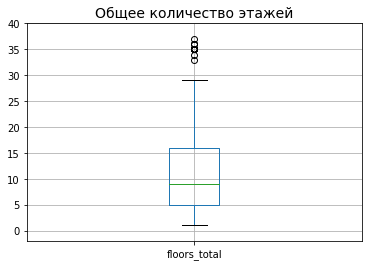

In [49]:
data.boxplot(column='floors_total')
plt.title('Общее количество этажей', fontweight='normal', color='k', fontsize=14)
plt.ylim(-2, 40)

Самые распространенные у нас пятиэтажки и девятиэтажки

расстояние до центра города в метрах

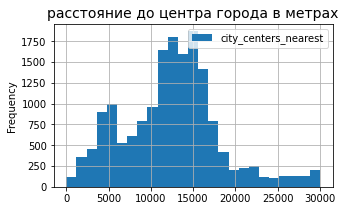

In [50]:
data.plot(y = 'city_сenters_nearest', kind = 'hist', bins = 25, grid=True, figsize = (5,3), range = (0,30000))
data['city_сenters_nearest'].describe()
plt.title('расстояние до центра города в метрах', fontweight='normal', color='k', fontsize=14)
plt.show()

(-2.0, 40000.0)

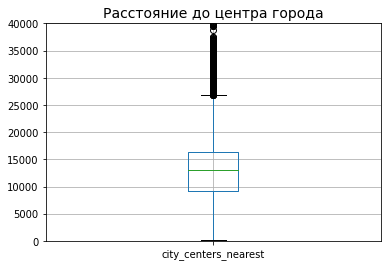

In [51]:
data.boxplot(column='city_сenters_nearest')
plt.title('Расстояние до центра города', fontweight='normal', color='k', fontsize=14)
plt.ylim(-2, 40000)

Саммые расспространенные значения лежат в диапозоне от 11 000 м до 17 500 м

расстояние до ближайшего аэропорта

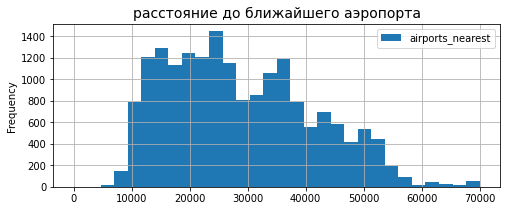

In [52]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, figsize = (8,3), range = (0,70000))
data['airports_nearest'].describe()
plt.title('расстояние до ближайшего аэропорта', fontweight='normal', color='k', fontsize=14)
plt.show()

(-2.0, 80000.0)

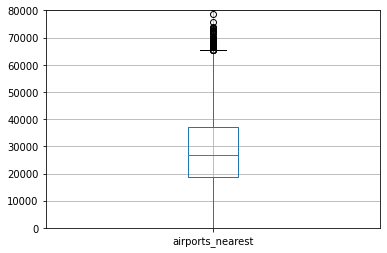

In [53]:
data.boxplot(column='airports_nearest')
plt.ylim(-2, 80000)

График примерно равномерный, без явных выбросов

расстояние до ближайшего парка

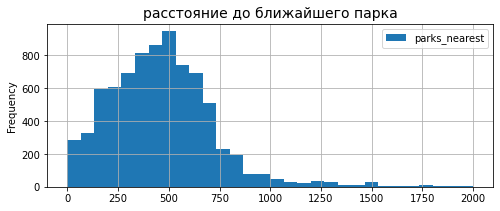

In [54]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (8,3), range = (0,2000))
data['parks_nearest'].describe()
plt.title('расстояние до ближайшего парка', fontweight='normal', color='k', fontsize=14)
plt.show()

(-2.0, 4000.0)

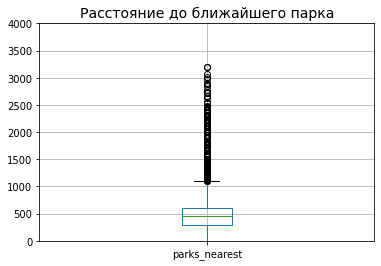

In [55]:
data.boxplot(column='parks_nearest')
plt.title('Расстояние до ближайшего парка', fontweight='normal', color='k', fontsize=14)
plt.ylim(-2, 4000)

Примерно в радиусе километра можно найти парк где можно прогуляться

День публикации объявления

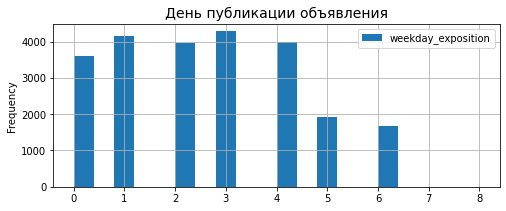

In [56]:
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 20, grid=True, figsize = (8,3), range = (0,8))
data['weekday_exposition'].describe()
plt.title('День публикации объявления', fontweight='normal', color='k', fontsize=14)
plt.show()

Где 0 это понедельник, 5 и 6 это суббота и воскресенье соответственно. На выходных меньше выкладывают объявления

месяц публикации объявления

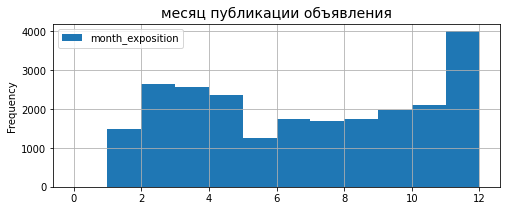

In [57]:
data.plot(y = 'month_exposition', kind = 'hist', bins = 12, grid=True, figsize = (8,3), range = (0,12))
data['month_exposition'].describe()
plt.title('месяц публикации объявления', fontweight='normal', color='k', fontsize=14)
plt.show()

Заметен наибольшей рост публикаций в декабре

2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

count   23565.00
mean      156.55
std       213.42
min         1.00
25%        22.00
50%        73.00
75%       198.00
max      1580.00
Name: days_exposition, dtype: float64

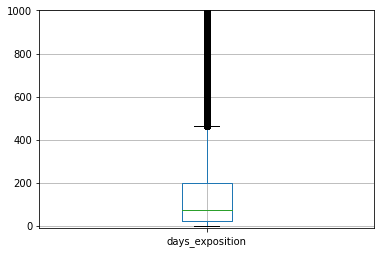

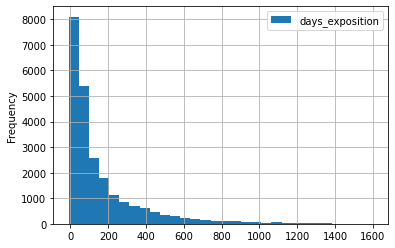

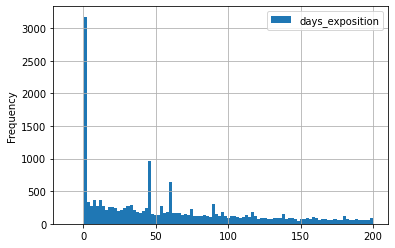

In [58]:
data.boxplot(column='days_exposition')
plt.ylim(-10,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (-10,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (-10,200))
data['days_exposition'].describe()

Сделав гистограмму со значениями от 0 до 200 , обнаружили выбивающиеся значения,у нас аномалии на 45, 60, 75, 90 днях - это наиболее популярное количество дней до снятия объявления. Может после этих сроков каждые 15 дней объявление снимается. Возможно сделки закрываются каждые 15 дней Быстрые продажи скорее всего до 45 дней до снятия объявления с публикации

Уберу редкие значения создав переменную good_data

count   21880.00
mean      164.27
std       219.56
min         1.00
25%        19.00
50%        83.00
75%       215.00
max      1580.00
Name: days_exposition, dtype: float64

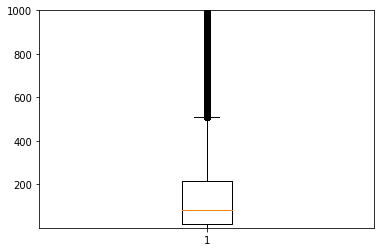

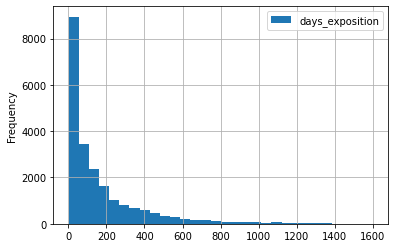

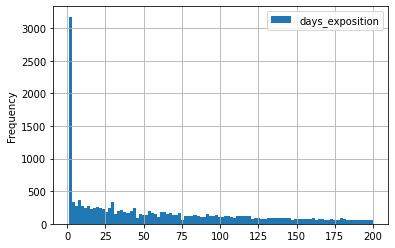

In [59]:
good_data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 75 and days_exposition != 90 and days_exposition != 0')

#диаграмма размаха
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

#гистограммы
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
#good_data['days_exposition'].value_counts()
good_data['days_exposition'].describe()

Представил графики без выбросов

3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

Зависимость цены от общей площади

0.6536213939252808

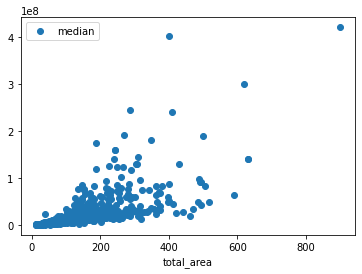

In [60]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

зависимость достаточно высокая - корреляции Пирсона - 0.65. То есть, чем больше площадь соответственно увеличивается стоимость

Зависимость цены от жилой площади

0.5857266472054451

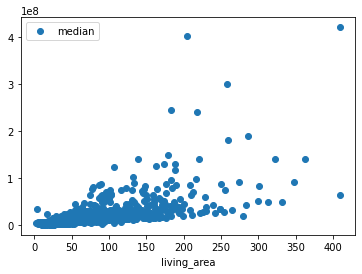

In [61]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')

pivot_table_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона - 0.5857. Зависимость есть но уже меньше по сравнению с общей площадью

Зависимость цены от площади кухни

0.5142587513932038

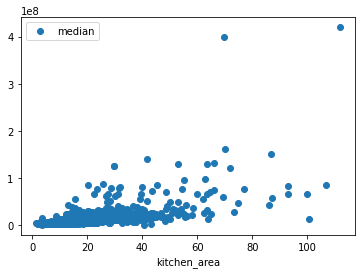

In [62]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o')

pivot_table_kitchen_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Коэффициент корреляции Пирсона - 0.514. Зависимость от площади кухни еще меньше

Зависимость цены от количества комнат

0.3631905485065752

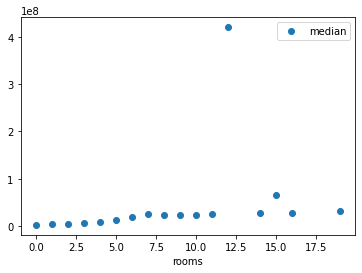

In [63]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y = 'median', style = 'o')

pivot_table_rooms.sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Зависимость мала

Далее зависимость от этажа на котором расположена квартира

,mean,count,median
floor_category,,,
другой,6674348.90,17326,4848500
первый,4802603.99,2909,3900000
последний,7359137.80,3330,4300000


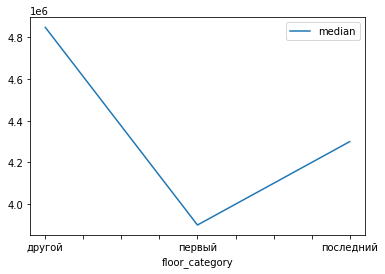

In [64]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Из графика можно сделать вывод что дешевле всего первый этаж, чуть дороже последний, и более дорогие не первый и не последний

Далее зависимость цены от даты размещения (день недели, месяц, год).

даты размещения (день недели, месяц, год).

,mean,count,median
weekday_exposition,,,
0,6518331.94,3596,4650000
1,6389281.18,4163,4720000
2,6630245.93,3948,4700000
3,6706766.02,4276,4650000
4,6359714.36,3980,4550000
5,6986165.10,1919,4550000
6,6242137.43,1683,4530000


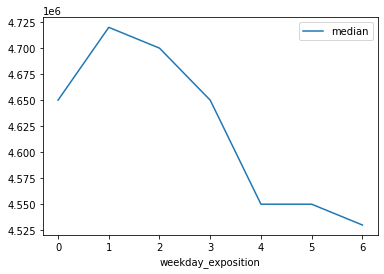

In [65]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
pivot_table_weekday_exposition

Дороже всего объекты выставленные на продажу во втоник, интересненько

,mean,count,median
month_exposition,,,
1,6664170.56,1487,4600000
2,6463940.87,2636,4650000
3,6359922.47,2575,4650000
4,6743395.47,2356,4800000
5,6591126.70,1261,4500000
6,6316912.64,1747,4400000
7,6639478.83,1686,4650000
8,6345783.76,1739,4570000
9,6838447.02,1972,4700000


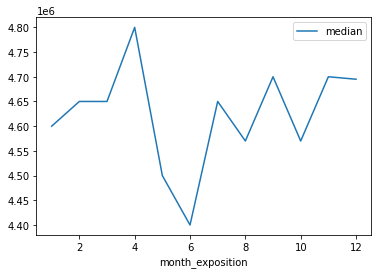

In [66]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
pivot_table_month_exposition

В зависимости от месяца график демонстрирует что дешевле всего квартиры в июне, как раз хотел закупиться, дождусь июня

,mean,count,median
year_exposition,,,
2014,12046600.18,136,7640000
2015,8595668.90,1166,5300500
2016,6829116.56,2745,4530000
2017,6582529.57,8161,4500000
2018,5954065.34,8486,4550000
2019,6779323.63,2871,5050000


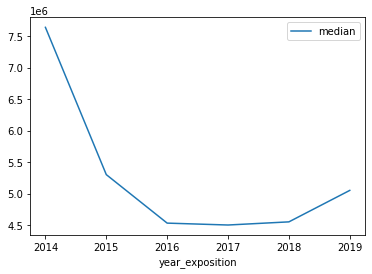

In [67]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
pivot_table_year_exposition

<AxesSubplot:>

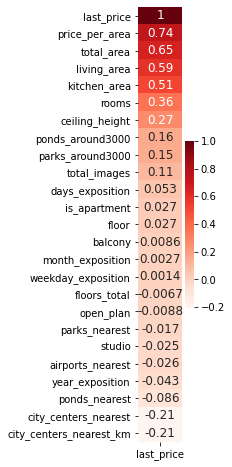

In [68]:
plt.figure(figsize=(1,8))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Reds", 
            annot=True, annot_kws={'size':12})

По тепловой карте видно, что как не крути на цену объекта недвижимости влияет площадь, в первую очередь площадь квадратного местра
а потом и общая, живая и так далее

Интересно, цена снижалась с 2014 по 2017 год, а как же инфляция.С середины 2017 года наблюдается рост

4.Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [69]:
locality_name_pivot = data.pivot_table(index='locality_name', values='price_per_area', aggfunc=['count', 'sum', 'mean']).reset_index(level=['locality_name'])
locality_name_pivot.columns = ['locality_name', 'count','sum','mean']
locality_name_pivot= locality_name_pivot.sort_values(by='count',ascending=False)
locality_name_pivot = locality_name_pivot.reset_index(drop = True)
locality_name_pivot.head(10)


,locality_name,count,sum,mean
0,Санкт-Петербург,15651,1797805859,114868.43
1,посёлок Мурино,520,44549858,85672.80
2,посёлок Шушары,439,34483838,78550.88
3,Всеволожск,398,27324295,68654.01
4,Пушкин,369,38053263,103125.37
5,Колпино,338,25493363,75424.15
6,посёлок Парголово,327,29487385,90175.49
7,Гатчина,307,21104928,68745.69
8,деревня Кудрово,299,27649453,92473.09
9,Выборг,237,13779533,58141.49


Среди десяти самых популярных населенных пунктов набольшая стоимость у нас для Санкт-Петербурга, самая низкая для Выборга

5. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

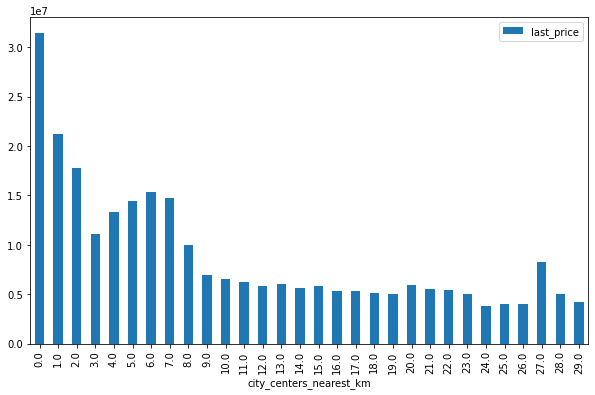

In [70]:
spb_pivot=(
    data.query('locality_name=="Санкт-Петербург"')
    .pivot_table(index='city_сenters_nearest_km',values='last_price', aggfunc='mean').reset_index()
)
spb_pivot.plot(x='city_сenters_nearest_km',y='last_price', kind='bar', alpha=1, figsize=(10,6))
plt.show()

В центре получается самая дорогая недвижимость, что логично. Чем дальше от центра тем дешевле

### Общий вывод

Зависимость стоимости квартиры от количества комнат - есть маленькая зависимость цена снижается с увеличением числа комнат ( возможно это связанно с тем что квартиры с 1-2 комнаты продаются охотнее). Квартиры на не на первом и не последнем этажах стоят дороже ну и спрос на них всегда выше. В центре квартиры дороже , цена снижается с удаленностью от центра. Стоимости квартиры от дня недели размещения объявления различаются от общей выборки, не считаю это важным критерием для дальнейшей работы с этим сравннением, возможно для разных городов и районов будет разная зависимоть. Есть сезонная зависимость. Цены за квадратный метр в летний сезон снижаются. Цены стоимости квадратного метра меняются с годами( влияние рынка недвижимости)